In [2]:
import tensorflow as tf
import numpy as  np
import os
import datetime

%tensorflow_version 2.x

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# Loading the data

URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip',origin=URL,extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [0]:
base_dir = os.path.join(os.path.dirname(zip_dir),'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [19]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [0]:
# Setting model Parameters

BATCH_SIZE = 100
IMG_SHAPE = 150

In [0]:
# Data Augmentation

image_gen_train = ImageDataGenerator(
                  rescale=1./255, # Rescaling images between f(x)=max(0,255)
                  rotation_range=40, # Rotate images 45 degrees
                  width_shift_range=0.2, # Shift Range
                  height_shift_range=0.2,
                  shear_range=0.2,
                  zoom_range=0.2, # Zoom on images
                  horizontal_flip=True, # Flip the images horizontally
                  fill_mode='nearest'
)

In [11]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

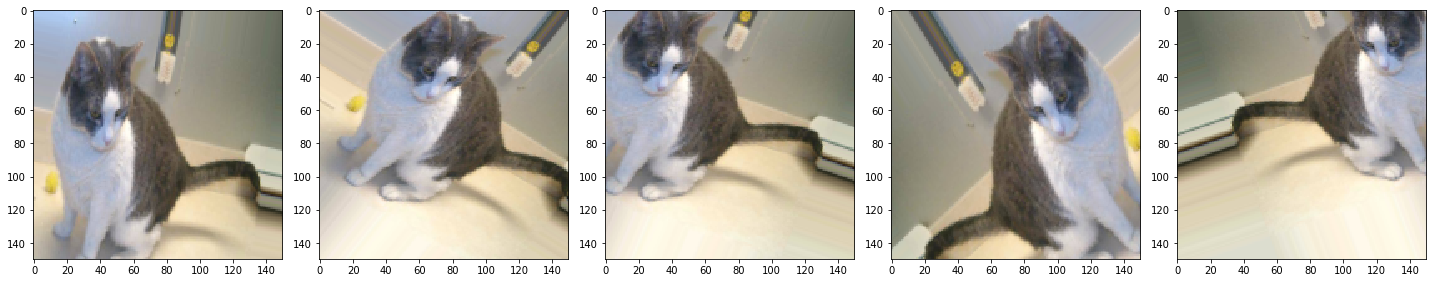

In [13]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [14]:
# Creating Validation Images

image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


In [16]:
# Model Creation 

model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu,input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(128,(3,3),activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(128,(3,3),activation=tf.nn.relu),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512,activation=tf.nn.relu),
        tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# Initializing Tensorboard

log_dir = 'logs/fit/' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)

In [21]:
# Fitting the model and calling tensorboard

history = model.fit_generator(train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=100,
    validation_data=val_data_gen,
    validation_steps = int(np.ceil(total_val / float(BATCH_SIZE))),
    callbacks=[tensorboard_callback])

Epoch 1/100
20/20 [==============================] - 53s 3s/step - loss: 0.7020 - acc: 0.5165 - val_loss: 0.6945 - val_acc: 0.5000
Epoch 2/100
20/20 [==============================] - 45s 2s/step - loss: 0.6927 - acc: 0.5235 - val_loss: 0.6889 - val_acc: 0.5490
Epoch 3/100
20/20 [==============================] - 45s 2s/step - loss: 0.6897 - acc: 0.5390 - val_loss: 0.6844 - val_acc: 0.5340
Epoch 4/100
20/20 [==============================] - 45s 2s/step - loss: 0.6743 - acc: 0.5835 - val_loss: 0.6507 - val_acc: 0.5960
Epoch 5/100
20/20 [==============================] - 45s 2s/step - loss: 0.6538 - acc: 0.6070 - val_loss: 0.6184 - val_acc: 0.6490
Epoch 6/100
20/20 [==============================] - 46s 2s/step - loss: 0.6365 - acc: 0.6250 - val_loss: 0.6177 - val_acc: 0.6270
Epoch 7/100
20/20 [==============================] - 45s 2s/step - loss: 0.6201 - acc: 0.6355 - val_loss: 0.6243 - val_acc: 0.6560
Epoch 8/100
20/20 [==============================] - 46s 2s/step - loss: 0.6163 - a

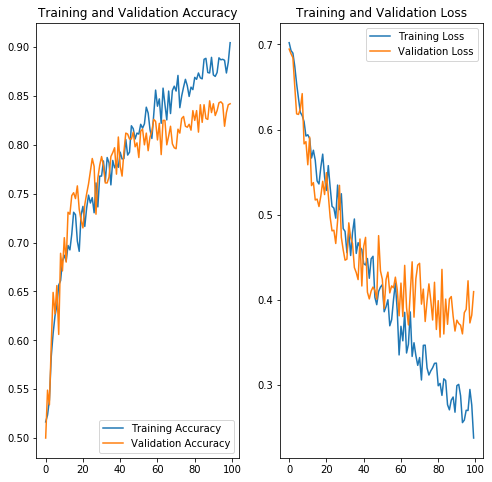

In [24]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
# Calling TensorBoard

%tensorboard --log logs/fit

